In [1]:
FASTA_hg38 = "/Users/ckuo/genome_data/GRCh38.primary_assembly.genome.fa.gz"

Get the sequences in FASTA format from a BED file

In [3]:
from genomkit import GRegions

exons = GRegions(name="exons", load="hg38_exons.bed")
exon_seqs = exons.get_GSequences(FASTA_file=FASTA_hg38)
exon_seqs.write_FASTA(filename="hg38_exons.fasta")

100%|██████████| 51662809/51662809 [00:35<00:00, 1466816.73it/s]


Get TSSs (Transcription Start Sites) and TTSs (Transcription Termination Sites) of genes in a BED file

In [4]:
from genomkit import GRegions

genes = GRegions(name="genes", load="hg38_genes.bed")
TSSs = genes.resize(extend_upstream=50, extend_downstream=50,
                    center="5prime", inplace=False)
TTSs = genes.resize(extend_upstream=50, extend_downstream=50,
                    center="3prime", inplace=False)
TSSs.write(filename="hg38_TSSs.bed")
TTSs.write(filename="hg38_TTSs.bed")

Merging the nearby peaks in a BED file

In [6]:
from genomkit import GRegions

peaks = GRegions(name="peaks", load="peaks.bed")
clustered_peaks = peaks.cluster(max_distance=50)
clustered_peaks.write(filename="clustered_peaks.bed")

Sampling the regions randomly in a BED file

In [8]:
from genomkit import GRegions

peaks = GRegions(name="peaks", load="peaks.bed")
samples = peaks.sampling(size=100, seed=42)
samples.write(filename="peaks_100_samples.bed")

Find the peaks in one BED file close to the regions in another BED file

In [9]:
from genomkit import GRegions

promoters = GRegions(name="promoters", load="hg38_promoters.bed")
promoters.extend(upstream=1000, downstream=1000, inplace=True)
peaks = GRegions(name="peaks", load="peaks.bed")
close_peaks = peaks.intersect(target=promoters, mode="ORIGINAL")
close_peaks.write(filename="peaks_close_to_promoters.bed")

Generate a heapmap from two BED files: one BED file is used as windows and the other used as the signal

Calculating coverage: 100%|██████████| 48709/48709 [00:49<00:00, 977.10it/s] 


<Axes: >

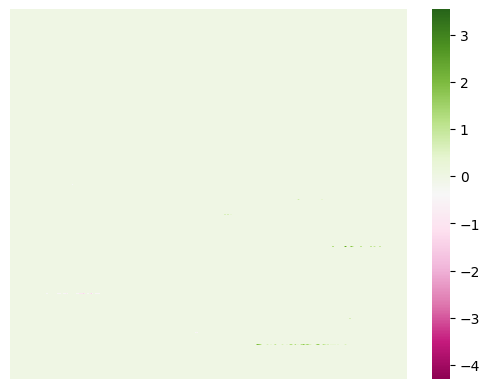

In [2]:
from genomkit import GRegions, GCoverages
import seaborn as sns
# Generate a heatmap from two BED files: one BED file is used as windows and the other used as the signal
DMLs = GRegions(name="DMLs", load="DML.bed")
DMLs.sort()
DMLs.extend(upstream=5, downstream=5, inplace=True)
TSSs = GRegions(name="genes", load="/Users/ckuo/rgtdata/mm10/genes_Gencode_mm10.bed")
TSSs.resize(extend_upstream=1000, extend_downstream=1000,
                    center="5prime", inplace=True)
TSSs.sampling(size=10000)
# TSSs.filter_by_names(names=, inplace=True)
cov = GCoverages(bin_size=1)
cov.calculate_coverage_GRegions(regions=TSSs, scores=DMLs)
cov.flip_negative_regions()
df = cov.get_dataframe()
sns.heatmap(df, xticklabels=False, yticklabels=False, cmap="PiYG")
# sns.heatmap(df, annot=True)

In [7]:
DMLs.elements[1].score

-0.661197579563083

In [8]:
float('-0.661197579563083') + 1

0.338802420436917

<Axes: >

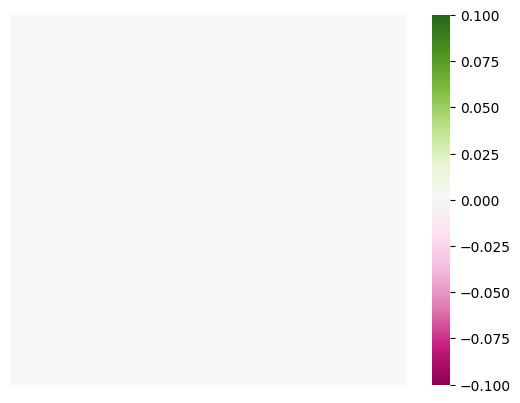

In [6]:
df.sum().sum()

0.0